In [25]:
import pandas as pd
import numpy as np

import time
import datetime

import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.cluster import KMeans

from matplotlib import pyplot as plt

from random import sample

In [2]:
df_a = pd.read_csv('~/CIS_4496_Project/data/raw/articles.csv')
df_t = pd.read_csv('~/CIS_4496_Project/data/raw/transactions_train.csv')

In [3]:
df_a

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [4]:
df_t

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [5]:
def convert_time(t_date):
    return time.mktime(datetime.datetime.strptime(t_date,"%Y-%m-%d").timetuple())

start_time = time.mktime(datetime.datetime.strptime('2020-01-01',"%Y-%m-%d").timetuple())

temp = list(map(convert_time, df_t['t_dat']))

In [6]:
df_t_2020 = df_t.copy()
df_t_2020['time'] = temp
df_t_2020 = df_t_2020[df_t_2020['time'] >= start_time].dropna().reset_index(drop=True)
df_t_2020

,t_dat,customer_id,article_id,price,sales_channel_id,time
0,2020-01-01,0034b3dced3e565a43438bdfb5447e7321fea65388b398...,835247001,0.033881,2,1.577855e+09
1,2020-01-01,00410b91d62eefa76958fa5cac12f5daa7cfc0556e417d...,802930002,0.067780,2,1.577855e+09
2,2020-01-01,00410b91d62eefa76958fa5cac12f5daa7cfc0556e417d...,760084008,0.025407,2,1.577855e+09
3,2020-01-01,004b0fb384bcab2f8e1059dd5ca68c17580365ab95c05a...,804662002,0.033881,2,1.577855e+09
4,2020-01-01,004b0fb384bcab2f8e1059dd5ca68c17580365ab95c05a...,801554002,0.016932,2,1.577855e+09
...,...,...,...,...,...,...
10980127,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,1.600747e+09
10980128,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,1.600747e+09
10980129,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1,1.600747e+09
10980130,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1,1.600747e+09


In [7]:
# df_t_subset = df_t_2020.sample(frac=0.01, random_state=9).reset_index(drop=True)
# df_t_subset

In [8]:
df_a_2020 = df_a.copy()
df_a_2020 = df_a_2020[df_a_2020['article_id'].isin(df_t_2020['article_id'].unique())].dropna().reset_index(drop=True)
df_a_2020

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
3,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61122,952267001,952267,Heavy plain overknee tights 1p,304,Underwear Tights,Socks & Tights,1010013,Other pattern,9,Black,...,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Fine-knit tights with an elasticated waist tha...
61123,952938001,952938,Elton top,254,Top,Garment Upper body,1010001,All over pattern,13,Beige,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,Fitted top in jersey with a round neckline and...
61124,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
61125,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...


In [9]:
#Clean the strings to remove punctation, remove common words, and lowercase
def clean_string(text):
    text = text.replace('’', '\'')
#     text = contractions.fix(text)
    text = ''.join([word for word in text if word not in string.punctuation])
    text = text.lower()
    return text

In [10]:
df_a_2020['clean_desc'] = list(map(clean_string, df_a_2020['detail_desc']))

In [11]:
tf = TfidfVectorizer(ngram_range = (1, 3), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(df_a_2020['clean_desc'])
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [12]:
df_cos_sim = pd.DataFrame(cos_sim)
df_cos_sim

,0,1,2,3,4,5,6,7,8,9,...,61117,61118,61119,61120,61121,61122,61123,61124,61125,61126
0,1.000000,1.000000,0.071885,0.071885,0.071885,0.000000,0.000000,0.000000,0.000000,0.011865,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010382,0.000000,0.0,0.024739
1,1.000000,1.000000,0.071885,0.071885,0.071885,0.000000,0.000000,0.000000,0.000000,0.011865,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010382,0.000000,0.0,0.024739
2,0.071885,0.071885,1.000000,1.000000,1.000000,0.000000,0.007290,0.007696,0.000000,0.011427,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.007420
3,0.071885,0.071885,1.000000,1.000000,1.000000,0.000000,0.007290,0.007696,0.000000,0.011427,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.007420
4,0.071885,0.071885,1.000000,1.000000,1.000000,0.000000,0.007290,0.007696,0.000000,0.011427,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.007420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61122,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010738,0.021984,0.070039,0.000000,...,0.001872,0.005492,0.000000,0.000000,0.007503,1.000000,0.000000,0.032544,0.0,0.000000
61123,0.010382,0.010382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003788,...,0.004871,0.000000,0.003146,0.003146,0.000000,0.000000,1.000000,0.000000,0.0,0.061191
61124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004619,0.000000,0.000000,...,0.020688,0.026987,0.024152,0.024152,0.007201,0.032544,0.000000,1.000000,0.0,0.000000
61125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007367,0.024294,0.008601,0.008601,0.015695,0.000000,0.000000,0.000000,1.0,0.000000


In [ ]:
cs = []
for i in range(11, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_cos_sim)
    cs.append(kmeans.inertia_)
    

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 


In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

NameError: name 'cs' is not defined

<Figure size 720x432 with 0 Axes>

In [16]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

pca = PCA(2)

transform = pca.fit_transform(df_cos_sim)

#Initialize the class object
kmeans = KMeans(n_clusters = 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(transform)
 
#Getting unique labels
u_labels = np.unique(label)

data = {'article_id': df_a_2020['article_id'].unique(),'cluster': label}
cluster_list = pd.DataFrame(data)
cluster_list

,article_id,cluster
0,108775015,8
1,108775044,8
2,110065001,5
3,110065002,5
4,110065011,5
...,...,...
61122,952267001,5
61123,952938001,5
61124,953450001,8
61125,953763001,3


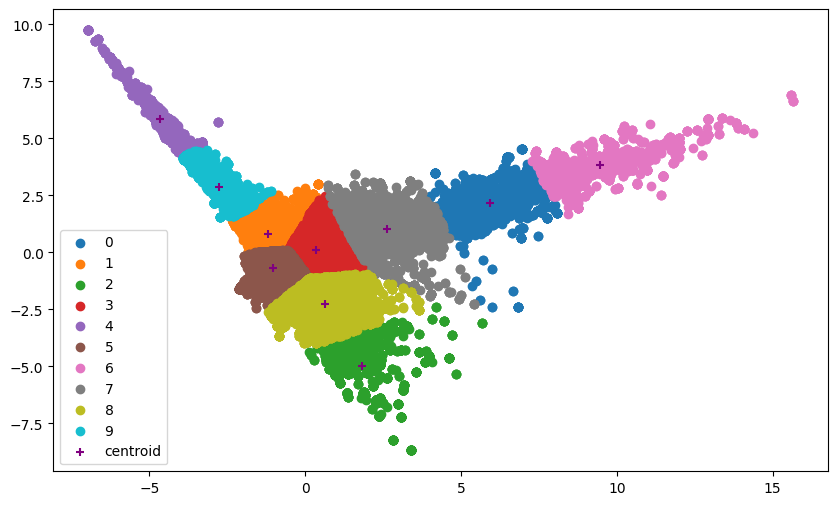

In [19]:
#plotting the results:
plt.figure(figsize=(10,6))
for i in u_labels:
    plt.scatter(transform[label == i , 0] , transform[label == i , 1] , label = i)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
plt.legend()
# plt.savefig('cluster.png')
plt.show()

In [20]:
cluster_list = pd.read_csv('cluster_list.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'cluster_list.csv'

In [21]:
def recommend(article_id):
    cluster = cluster_list[cluster_list['article_id'] == article_id].reset_index(drop=True)['cluster'][0]
    return list(cluster_list[cluster_list['cluster'] == cluster].reset_index(drop=True)['article_id'].sample(n=12))

In [22]:
df_c = pd.read_csv('~/CIS_4496_Project/data/raw/customers.csv')

In [10]:
# df_ct = pd.DataFrame(columns=['customer_id', 'articles'])

# customer_id = []
# articles = []

# for c in df_t_subset['customer_id'].unique():
#     customer_id.append(c)
#     articles.append(df_t_subset[df_t_subset['customer_id'] == c]['article_id'])

# df_ct['customer_id'] = customer_id
# df_ct['articles'] = articles

In [16]:
# df_ct.to_csv('df_ct.csv')

'e80d8ecc7fc9d6be8de378622f679bd505da1397d70177a2a86ce7bbab05a5f3'

In [ ]:
submission = pd.DataFrame(columns=['customer_id', 'prediction'])

prediction = []
# cluster_subset = df_t[df_t_2020['article_id'].isin(cluster_list['article_id'].unique())].dropna().reset_index(drop=True)

for c in df_c['customer_id'].unique():
#     print(c)
    try:
        prediction.append(recommend(sample(list(df_t_2020[df_t_2020['customer_id'] == c]['article_id']),1)[0]))
    except:
        prediction.append(sample(list(df_a['article_id']), 12))

In [ ]:
submission['prediction'] = prediction
submission['customer_id'] = df_c['customer_id'].unique()

submission.to_csv('submission.csv')

In [115]:
# recommend(sample(list(df_t_subset[df_t_subset['customer_id'] == '74f956436605814fbd6ccde66bba53016b21aede7f4daba0dd6d9f754dc4cbee']['article_id']),1)[0])
# list(df_t_subset[df_t_subset['customer_id'] == '74f956436605814fbd6ccde66bba53016b21aede7f4daba0dd6d9f754dc4cbee']['article_id'])

# cluster_list[cluster_list['article_id'] == 507883014].reset_index(drop=True)['cluster']

df_t_subset['article_id'].nunique()

23132

In [117]:
cluster_list['article_id'].nunique()

23108

In [77]:
sample(list(df_t_subset[df_t_subset['customer_id'] == 'e80d8ecc7fc9d6be8de378622f679bd505da1397d70177a2a86ce7bbab05a5f3']['article_id']),1)[0]

713824040

In [39]:
list(df_t_subset[df_t_subset['customer_id'] == 'e80d8ecc7fc9d6be8de378622f679bd505da1397d70177a2a86ce7bbab05a5f3']['article_id'])[0]


860949003

In [52]:
cluster_list[cluster_list['article_id'] == 860949003].reset_index(drop=True)['cluster'][0]

3

In [119]:
df_t_subset['article_id'].nunique()

23132

In [42]:
try:
    recommend(sample(list(df_t_2020[df_t_2020['customer_id'] == df_c['customer_id'][3]]['article_id']),1)[0])
except:
    print('test')

test


In [23]:
df_c

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...
